In [5]:
import matplotlib.pyplot as plt

In [6]:
#도미 train_data
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

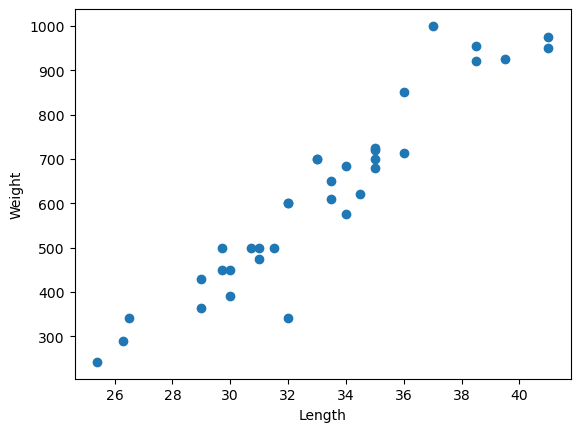

In [7]:
plt.scatter(bream_length,bream_weight)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [8]:
#빙어 train_data
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

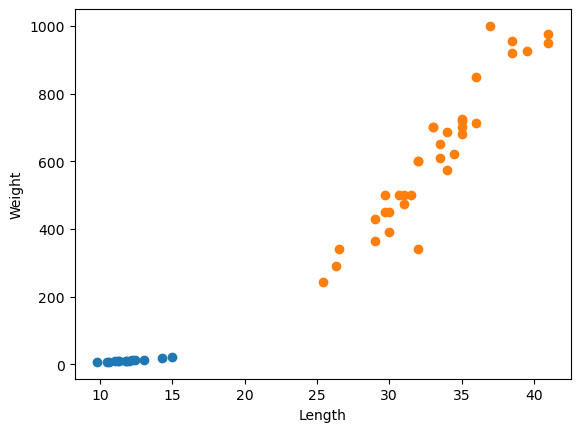

In [9]:
plt.scatter(smelt_length,smelt_weight)
plt.scatter(bream_length,bream_weight)
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

    빙어도 도미와 유사하게 길이와 무게가 비례하지만 그 정도가 다르다.
    도미(breams,orange)는 더 높은 기울기를 보이지만, 빙어(smelt,blue)는 더 낮은 기울기를 보인다. 

## 이 데이터를 KNN 알고리즘을 이용할 것이다.

In [10]:
import pandas as pd

In [11]:
fish_length = smelt_length + bream_length
fish_weight = smelt_weight + bream_weight

기존에 리스트로 받은 데이터를 어떻게 합칠 것인가?

In [12]:
#1번 방법
fish_list = [[l,w] for l,w in zip(fish_length,fish_weight)]

In [13]:
fish_list

[[9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9],
 [25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0]]

In [14]:
# fish_df = pd.DataFrame(fish_list, columns = ['Length', 'Weight'])   # 열과 행에 각각 label을 명시적으로 지정함
# fish_df

,Length,Weight
0,9.8,6.7
1,10.5,7.5
2,10.6,7.0
3,11.0,9.7
4,11.2,9.8
5,11.3,8.7
6,11.8,10.0
7,11.8,9.9
8,12.0,9.8
9,12.2,12.2


1번 방법 끝

2번 방법 

In [15]:
# fish_length= pd.Series(fish_length)
# fish_weight= pd.Series(fish_weight)

In [16]:
# fish_df = pd.DataFrame({"Length":fish_length,"Weight": fish_weight})
# fish_df

,Length,Weight
0,9.8,6.7
1,10.5,7.5
2,10.6,7.0
3,11.0,9.7
4,11.2,9.8
5,11.3,8.7
6,11.8,10.0
7,11.8,9.9
8,12.0,9.8
9,12.2,12.2


2번 방법 끝

    1번 방법이 교재에 적힌 방법이지만 zip함수가 처음이고 문법이 한줄안에 for loop을 적용한 것으로 보이는데 익숙치 않아 기존에 배웠던 것들을 활용해 DF로 변환하는 것이 2번 방법이다 

In [22]:
fish_target = [0]*14 + [1]*35

In [17]:
# fish_target = pd.Series([1]*35+[0]*14)
# fish_target

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
dtype: int64

In [18]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

KNN 알고리즘은 데이터에 대한 답을 구할 때 주위의 다른 데이터를 보고 다수를 차지하는 것을 정답으로 사용합니다. <BR>
즉, 새로운 데이터에 대해 예측할 떄는 가장 가까운 직선거리에 어떤 데이터가 있는지를 살피기만 하면 됩니다. <BR>
단점은 이러한 특징 때문에 데이터가 무수히 많은 경우에 쓰기 어렵습니다. (시간적으로,성능적으로)<BR>
기본적으로 KNN은 가까운 5개의 데이터를 참고한다.<BR>
이것은 n_neighbors 매개변수를 통해 바꿀 수 있다. 

In [19]:
kn = KNeighborsClassifier()

In [23]:
kn.fit(fish_df,fish_target)

KNeighborsClassifier()

In [24]:
kn.score(fish_df,fish_target)

c:\Users\JINU\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [32]:
kn.predict([[30,600]])

c:\Users\JINU\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\JINU\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1])

In [34]:
kn._fit_X

array([[   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],
       [  11.3,    8.7],
       [  11.8,   10. ],
       [  11.8,    9.9],
       [  12. ,    9.8],
       [  12.2,   12.2],
       [  12.4,   13.4],
       [  13. ,   12.2],
       [  14.3,   19.7],
       [  15. ,   19.9],
       [  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],


In [35]:
kn._y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [36]:
kn49=KNeighborsClassifier(n_neighbors=49)

In [37]:
kn49.fit(fish_df,fish_target)

KNeighborsClassifier(n_neighbors=49)

In [38]:
kn49.score(fish_df,fish_target)

c:\Users\JINU\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7142857142857143

49개의 데이터중 35개가 도미이므로 fish_df의 어떤 값이 들어가든 도미로 인식할 것이다. 따라서 좋은 모델 선택이 아니었다고 할 수 있겠다.

In [39]:
35/49

0.7142857142857143

In [42]:
#연습문제 4번 
kn = KNeighborsClassifier()
kn.fit(fish_df,fish_target)

for n in range(5,50):
    kn.n_neighbors = n
    score = kn.score(fish_df,fish_target)
    if score<1.0:
        print(n,score)

c:\Users\JINU\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\JINU\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

18 0.9795918367346939
19 0.9795918367346939
20 0.9795918367346939
21 0.9795918367346939
22 0.9795918367346939
23 0.9795918367346939
24 0.9795918367346939
25 0.9795918367346939
26 0.9795918367346939
27 0.9795918367346939
28 0.9591836734693877
29 0.7142857142857143
30 0.7142857142857143
31 0.7142857142857143
32 0.7142857142857143
33 0.7142857142857143
34 0.7142857142857143
35 0.7142857142857143
36 0.7142857142857143
37 0.7142857142857143
38 0.7142857142857143
39 0.7142857142857143
40 0.7142857142857143
41 0.7142857142857143
42 0.7142857142857143
43 0.7142857142857143
44 0.7142857142857143
45 0.7142857142857143
46 0.7142857142857143
47 0.7142857142857143
48 0.7142857142857143
49 0.7142857142857143


c:\Users\JINU\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\JINU\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

n이 너무 많아지면 어느 순간부터 score가 감소하기 시작함. 그렇다고 여기서 가장 높은 17을 가져간다면 이것은 train셋에 최적화된 score이기 때문에 일반화가 잘 되지 않을 수 있음. 